In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd "/content/drive/MyDrive/Colab Notebooks/Intro to AI-520/Better Smarter Faster/"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/Intro to AI-520/Better Smarter Faster


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle

with open('Our Data/utility.pickle', 'rb') as f:
  utility = pickle.load(f)

In [ ]:
#create data
size = 50

#convert 3d Array into vector
reshape = []
for i in range(1, size+1):
  for j in range(1, size+1):
    for k in range(1, size+1):
      reshape.append([i, j, k, utility[(i,j,k)]])
vec = np.array(reshape)
print(vec)  

[[   1.    1.    1. 1000.]
 [   1.    1.    2.    0.]
 [   1.    1.    3.    0.]
 ...
 [  50.   50.   48.    0.]
 [  50.   50.   49.    0.]
 [  50.   50.   50. 1000.]]


In [ ]:
data = pd.DataFrame(vec, columns = ['Agent','Prey','Predator', 'Utility'])
data.head()

,Agent,Prey,Predator,Utility
0,1.0,1.0,1.0,1000.0
1,1.0,1.0,2.0,0.0
2,1.0,1.0,3.0,0.0
3,1.0,1.0,4.0,0.0
4,1.0,1.0,5.0,0.0


In [ ]:
m,n = vec.shape
np.random.shuffle(vec)
print(m,n)
#Training split
training = vec[0:100000].T
x_train = training[0:n-1].T
y_train = training[n-1].T

#Testing split
testing = vec[100001: m]
x_test = testing[0:n-1]
y_test = testing[n-1]

125000 4


In [ ]:
data = pd.DataFrame(x_train)
data.head()

,0,1,2
0,11.0,11.0,34.0
1,48.0,17.0,4.0
2,21.0,19.0,4.0
3,47.0,12.0,36.0
4,50.0,9.0,28.0


In [ ]:
data = pd.DataFrame(y_train)
data.head()

,0
0,0.000000
1,4.102808
2,2.075054
3,4.411578
4,3.786645


In [ ]:
class ForwardPass:
  def __init__(self, isize, osize):
    self.input_size = isize
    self.output_size = osize
    self.weights = np.random.randn(isize, output_size) / np.sqrt(100*(isize + osize))
    self.bias = np.random.randn(1, osize) / np.sqrt(100*(isize + osize))

  def forwardProp(self, input):
    self.input = input
    return np.dot(input, self.weights) + self.bias

  def backwardProp(self, output_error, learning_rate):
    input_error = np.dot(output_error, self.weights.T)
    weights_error = np.dot(self.input.T, output_error)
    self.weights -= learning_rate * weights_error
    self.bias -= learning_rate * output_error
    return input_error

In [ ]:
class ActivationFunction:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forwardProp(self, input):
        self.input = input
        return self.activation(input)
    
    def backwardProp(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)

In [ ]:
def mse(y_true, y_pred):
  return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
  return 2 * (y_pred - y_true) / y_pred.size

In [ ]:
def leaky_ReLU(x):
  #vanilla relu
  # return np.maximum(0, Z)
  return np.where(x > 0, x, x * 0.01)  

def leaky_ReLU_prime(x):
  #vanilla relu
  # return Z > 0
  return np.where(x > 0, 1, 0.01)  

In [ ]:
errors = []
neural_network = [
  ForwardPass(3, 20),
  ActivationFunction(leaky_ReLU, leaky_ReLU_prime),
  ForwardPass(20, 10),
  ActivationFunction(leaky_ReLU, leaky_ReLU_prime),
  ForwardPass(10, 1),
  ActivationFunction(leaky_ReLU, leaky_ReLU_prime)
]

epochs = 100000
learning_rate = 0.1

for epoch in range(epochs):
  error = 0
  for x, y_true in zip(x_train, y_train):
    # forward
    x = x.reshape((1, x.shape[0]))
    output = x
    for layer in neural_network:
      output = layer.forwardProp(output)
    
    # error (display purpose only)
    # print(output, y_true)
    error += mse(y_true, output)
    # print(error)

    # backward
    output_error = mse_prime(y_true, output)
    for layer in reversed(network):
      output_error = layer.backwardProp(output_error, learning_rate)
  
  error /= len(x_train)
  print("Loss for iteration {} => {}".format(epoch,error))
  errors.append(error)

Loss for iteration 0 => 43.84377236648119
Loss for iteration 1 => 43.4013457400079
Loss for iteration 2 => 42.78437369481772
Loss for iteration 3 => 41.72170561858684
Loss for iteration 4 => 39.91401189690062
Loss for iteration 5 => 36.871018720917775
Loss for iteration 6 => 32.08937190361348
Loss for iteration 7 => 25.60618204612556
Loss for iteration 8 => 18.852726335740225
Loss for iteration 9 => 14.258925025571168
Loss for iteration 10 => 12.5421394445386
Loss for iteration 11 => 12.192942570124018
Loss for iteration 12 => 12.110074731773127
Loss for iteration 13 => 12.053212800639947
Loss for iteration 14 => 11.998202986329625
Loss for iteration 15 => 11.943377175042544
Loss for iteration 16 => 11.888605548889206
Loss for iteration 17 => 11.833849567523401
Loss for iteration 18 => 11.779076349285665
Loss for iteration 19 => 11.724253802016865
Loss for iteration 20 => 11.669350349075385
Loss for iteration 21 => 11.614334822897714
Loss for iteration 22 => 11.559176486114984
Loss for

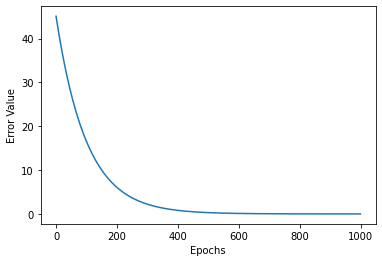

In [ ]:
X = np.arange(len(errors))
Y = np.array(errors)
plt.xlabel("Epochs")  
plt.ylabel("Error Value")  
plt.plot(X,Y)
plt.show()

In [ ]:
def predict(X):
  for layer in network:
    output = layer.forward(output)
  return output

In [ ]:
V_star= {}
for i in range(125000):
  X = data.iloc[i,:-1].values
  X = np.expand_dims(X,axis = 1)
  y = predict(X)
  V_star[(X[0][0],X[1][0],X[2][0])] = y[0][0]

In [ ]:
print(V_star[(1,10,1)])

6.499662742392664


In [ ]:
with open("Our Data/vstar.pickle", "wb") as f:
  pickle.dump(V_star,f)